In [1]:
import math
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import numpy as np
from tqdm import tqdm

In [2]:
from tdmclient import ClientAsync
client = ClientAsync()
node = await client.wait_for_node()
print(node)

Node 47693a04-0b6a-4e1f-bcfa-ab642b293fc0


In [7]:
#await node.unlock()

In [3]:
await node.lock()
from threading import Timer

In [4]:
class RepeatedTimer(object):
    def __init__(self, interval, function, *args, **kwargs):
        self._timer     = None
        self.interval   = interval
        self.function   = function
        self.args       = args
        self.kwargs     = kwargs
        self.is_running = False
        self.start()

    def _run(self):
        self.is_running = False
        self.start()
        self.function(*self.args, **self.kwargs)

    def start(self):
        if not self.is_running:
            self._timer = Timer(self.interval, self._run)
            self._timer.start()
            self.is_running = True

    def stop(self):
        self._timer.cancel()
        self.is_running = False

In [5]:
def motors(left, right):
    return {
        "motor.left.target": [left],
        "motor.right.target": [right],
    }

def get_data():
    thymio_data.append({"ground": list(node["prox.ground.reflected"]),
                        "sensor": list(node["prox.ground.reflected"]),
                        "left_speed": node["motor.left.speed"],
                        "right_speed": node["motor.right.speed"]})


In [17]:
acquire_data = True
Ts = 0.1
thymio_data=[]


scenario = 'straight line'

if acquire_data:
    await node.wait_for_variables()  # wait for Thymio variables values
    rt = RepeatedTimer(Ts, get_data)  # it auto-starts, no need of rt.start()
    RepeatedTimer
    

    try:
        # time.sleep would not work here, use asynchronous client.sleep method instead
        await client.sleep(5)
        if scenario == 'sharp right':
            node.send_set_variables(motors(100, 100))
            await client.sleep(10)  # your long-running job goes here...
            node.send_set_variables(motors(100, 0))
            await client.sleep(5)
            node.send_set_variables(motors(100, 100))
            await client.sleep(10)
        elif scenario == 'circle':
            node.send_set_variables(motors(100, 30))
            await client.sleep(30)
        elif scenario == 'straight line':
            node.send_set_variables(motors(100, 100))
            await client.sleep(25)
        elif scenario == 'chicane':
            node.send_set_variables(motors(100, 100))
            await client.sleep(10)  # your long-running job goes here...
            node.send_set_variables(motors(100, 0))
            await client.sleep(4)
            node.send_set_variables(motors(100, 100))
            await client.sleep(10)
            node.send_set_variables(motors(0, 100))
            await client.sleep(4)
            node.send_set_variables(motors(100, 100))
            await client.sleep(10)
        
        
    finally:
        rt.stop()  # better in a try/finally block to make sure the program ends!
        node.send_set_variables(motors(0, 0))
else:
    thymio_data = [{'ground': [177, 496], 'sensor': [177, 496], 'left_speed': 0, 'right_speed': 65535}, {'ground': [178, 495], 'sensor': [178, 495], 'left_speed': 0, 'right_speed': 65535}, {'ground': [177, 495], 'sensor': [177, 495], 'left_speed': 0, 'right_speed': 65535}, {'ground': [177, 496], 'sensor': [177, 496], 'left_speed': 0, 'right_speed': 65535}, {'ground': [177, 495], 'sensor': [177, 495], 'left_speed': 0, 'right_speed': 65535}, {'ground': [178, 496], 'sensor': [178, 496], 'left_speed': 0, 'right_speed': 65535}, {'ground': [178, 495], 'sensor': [178, 495], 'left_speed': 0, 'right_speed': 65535}, {'ground': [177, 496], 'sensor': [177, 496], 'left_speed': 0, 'right_speed': 65535}, {'ground': [177, 496], 'sensor': [177, 496], 'left_speed': 0, 'right_speed': 65535}, {'ground': [178, 495], 'sensor': [178, 495], 'left_speed': 0, 'right_speed': 65535}, {'ground': [177, 495], 'sensor': [177, 495], 'left_speed': 0, 'right_speed': 65535}, {'ground': [177, 497], 'sensor': [177, 497], 'left_speed': 0, 'right_speed': 65535}, {'ground': [177, 495], 'sensor': [177, 495], 'left_speed': 0, 'right_speed': 65535}, {'ground': [177, 495], 'sensor': [177, 495], 'left_speed': 0, 'right_speed': 65535}, {'ground': [178, 496], 'sensor': [178, 496], 'left_speed': 0, 'right_speed': 65535}, {'ground': [180, 546], 'sensor': [180, 546], 'left_speed': 0, 'right_speed': 65535}, {'ground': [177, 454], 'sensor': [177, 454], 'left_speed': 0, 'right_speed': 65535}, {'ground': [97, 69], 'sensor': [97, 69], 'left_speed': 0, 'right_speed': 65535}, {'ground': [39, 41], 'sensor': [39, 41], 'left_speed': 0, 'right_speed': 0}, {'ground': [82, 47], 'sensor': [82, 47], 'left_speed': 0, 'right_speed': 65535}, {'ground': [34, 29], 'sensor': [34, 29], 'left_speed': 0, 'right_speed': 65535}, {'ground': [24, 9], 'sensor': [24, 9], 'left_speed': 0, 'right_speed': 65535}, {'ground': [899, 447], 'sensor': [899, 447], 'left_speed': 0, 'right_speed': 65535}, {'ground': [967, 631], 'sensor': [967, 631], 'left_speed': 0, 'right_speed': 65535}, {'ground': [972, 682], 'sensor': [972, 682], 'left_speed': 0, 'right_speed': 65535}, {'ground': [971, 675], 'sensor': [971, 675], 'left_speed': 0, 'right_speed': 65535}, {'ground': [970, 651], 'sensor': [970, 651], 'left_speed': 0, 'right_speed': 65535}, {'ground': [971, 642], 'sensor': [971, 642], 'left_speed': 0, 'right_speed': 65535}, {'ground': [970, 628], 'sensor': [970, 628], 'left_speed': 0, 'right_speed': 65535}, {'ground': [970, 628], 'sensor': [970, 628], 'left_speed': 0, 'right_speed': 65535}, {'ground': [970, 628], 'sensor': [970, 628], 'left_speed': 0, 'right_speed': 65535}, {'ground': [970, 627], 'sensor': [970, 627], 'left_speed': 0, 'right_speed': 65535}, {'ground': [970, 611], 'sensor': [970, 611], 'left_speed': 0, 'right_speed': 65535}, {'ground': [971, 604], 'sensor': [971, 604], 'left_speed': 0, 'right_speed': 0}, {'ground': [971, 598], 'sensor': [971, 598], 'left_speed': 0, 'right_speed': 65535}, {'ground': [972, 642], 'sensor': [972, 642], 'left_speed': 0, 'right_speed': 65535}, {'ground': [973, 714], 'sensor': [973, 714], 'left_speed': 0, 'right_speed': 65535}, {'ground': [973, 704], 'sensor': [973, 704], 'left_speed': 0, 'right_speed': 65535}, {'ground': [973, 702], 'sensor': [973, 702], 'left_speed': 0, 'right_speed': 0}, {'ground': [972, 700], 'sensor': [972, 700], 'left_speed': 0, 'right_speed': 65535}, {'ground': [973, 701], 'sensor': [973, 701], 'left_speed': 0, 'right_speed': 0}, {'ground': [974, 707], 'sensor': [974, 707], 'left_speed': 0, 'right_speed': 0}, {'ground': [974, 711], 'sensor': [974, 711], 'left_speed': 0, 'right_speed': 65535}, {'ground': [974, 707], 'sensor': [974, 707], 'left_speed': 0, 'right_speed': 65535}, {'ground': [972, 702], 'sensor': [972, 702], 'left_speed': 0, 'right_speed': 65535}, {'ground': [973, 686], 'sensor': [973, 686], 'left_speed': 0, 'right_speed': 65535}, {'ground': [972, 662], 'sensor': [972, 662], 'left_speed': 0, 'right_speed': 65535}, {'ground': [968, 602], 'sensor': [968, 602], 'left_speed': 0, 'right_speed': 65535}, {'ground': [954, 539], 'sensor': [954, 539], 'left_speed': 0, 'right_speed': 65535}, {'ground': [833, 464], 'sensor': [833, 464], 'left_speed': 0, 'right_speed': 65535}, {'ground': [826, 460], 'sensor': [826, 460], 'left_speed': 2, 'right_speed': 65535}, {'ground': [511, 244], 'sensor': [511, 244], 'left_speed': 39, 'right_speed': 31}, {'ground': [306, 131], 'sensor': [306, 131], 'left_speed': 49, 'right_speed': 35}, {'ground': [194, 87], 'sensor': [194, 87], 'left_speed': 58, 'right_speed': 57}, {'ground': [174, 84], 'sensor': [174, 84], 'left_speed': 64, 'right_speed': 42}, {'ground': [174, 84], 'sensor': [174, 84], 'left_speed': 38, 'right_speed': 32}, {'ground': [174, 84], 'sensor': [174, 84], 'left_speed': 38, 'right_speed': 32}, {'ground': [171, 84], 'sensor': [171, 84], 'left_speed': 58, 'right_speed': 30}, {'ground': [169, 81], 'sensor': [169, 81], 'left_speed': 49, 'right_speed': 56}, {'ground': [167, 80], 'sensor': [167, 80], 'left_speed': 42, 'right_speed': 55}, {'ground': [167, 81], 'sensor': [167, 81], 'left_speed': 46, 'right_speed': 35}, {'ground': [168, 80], 'sensor': [168, 80], 'left_speed': 59, 'right_speed': 57}, {'ground': [172, 81], 'sensor': [172, 81], 'left_speed': 63, 'right_speed': 54}, {'ground': [173, 84], 'sensor': [173, 84], 'left_speed': 45, 'right_speed': 56}, {'ground': [171, 84], 'sensor': [171, 84], 'left_speed': 60, 'right_speed': 55}, {'ground': [171, 84], 'sensor': [171, 84], 'left_speed': 60, 'right_speed': 55}, {'ground': [165, 84], 'sensor': [165, 84], 'left_speed': 54, 'right_speed': 36}, {'ground': [166, 86], 'sensor': [166, 86], 'left_speed': 57, 'right_speed': 43}, {'ground': [166, 86], 'sensor': [166, 86], 'left_speed': 41, 'right_speed': 43}, {'ground': [168, 87], 'sensor': [168, 87], 'left_speed': 59, 'right_speed': 47}, {'ground': [175, 96], 'sensor': [175, 96], 'left_speed': 42, 'right_speed': 48}, {'ground': [280, 157], 'sensor': [280, 157], 'left_speed': 61, 'right_speed': 50}, {'ground': [503, 262], 'sensor': [503, 262], 'left_speed': 60, 'right_speed': 49}, {'ground': [658, 355], 'sensor': [658, 355], 'left_speed': 46, 'right_speed': 36}, {'ground': [639, 345], 'sensor': [639, 345], 'left_speed': 49, 'right_speed': 57}, {'ground': [639, 345], 'sensor': [639, 345], 'left_speed': 49, 'right_speed': 57}, {'ground': [501, 257], 'sensor': [501, 257], 'left_speed': 42, 'right_speed': 51}, {'ground': [187, 88], 'sensor': [187, 88], 'left_speed': 45, 'right_speed': 60}, {'ground': [166, 85], 'sensor': [166, 85], 'left_speed': 53, 'right_speed': 56}, {'ground': [166, 84], 'sensor': [166, 84], 'left_speed': 60, 'right_speed': 55}, {'ground': [168, 84], 'sensor': [168, 84], 'left_speed': 50, 'right_speed': 53}, {'ground': [169, 85], 'sensor': [169, 85], 'left_speed': 57, 'right_speed': 47}, {'ground': [167, 87], 'sensor': [167, 87], 'left_speed': 49, 'right_speed': 41}, {'ground': [169, 86], 'sensor': [169, 86], 'left_speed': 47, 'right_speed': 45}, {'ground': [167, 84], 'sensor': [167, 84], 'left_speed': 66, 'right_speed': 33}, {'ground': [164, 85], 'sensor': [164, 85], 'left_speed': 56, 'right_speed': 62}, {'ground': [162, 85], 'sensor': [162, 85], 'left_speed': 43, 'right_speed': 54}, {'ground': [163, 85], 'sensor': [163, 85], 'left_speed': 54, 'right_speed': 58}, {'ground': [163, 85], 'sensor': [163, 85], 'left_speed': 41, 'right_speed': 54}, {'ground': [160, 84], 'sensor': [160, 84], 'left_speed': 59, 'right_speed': 56}, {'ground': [156, 82], 'sensor': [156, 82], 'left_speed': 52, 'right_speed': 60}, {'ground': [157, 82], 'sensor': [157, 82], 'left_speed': 64, 'right_speed': 48}, {'ground': [162, 83], 'sensor': [162, 83], 'left_speed': 64, 'right_speed': 56}, {'ground': [166, 82], 'sensor': [166, 82], 'left_speed': 47, 'right_speed': 55}, {'ground': [165, 91], 'sensor': [165, 91], 'left_speed': 41, 'right_speed': 44}, {'ground': [254, 156], 'sensor': [254, 156], 'left_speed': 67, 'right_speed': 59}, {'ground': [477, 279], 'sensor': [477, 279], 'left_speed': 53, 'right_speed': 57}, {'ground': [678, 391], 'sensor': [678, 391], 'left_speed': 57, 'right_speed': 59}, {'ground': [762, 426], 'sensor': [762, 426], 'left_speed': 67, 'right_speed': 57}, {'ground': [738, 394], 'sensor': [738, 394], 'left_speed': 41, 'right_speed': 50}, {'ground': [649, 332], 'sensor': [649, 332], 'left_speed': 60, 'right_speed': 56}, {'ground': [596, 319], 'sensor': [596, 319], 'left_speed': 65, 'right_speed': 59}, {'ground': [593, 321], 'sensor': [593, 321], 'left_speed': 47, 'right_speed': 48}, {'ground': [596, 325], 'sensor': [596, 325], 'left_speed': 58, 'right_speed': 33}, {'ground': [601, 330], 'sensor': [601, 330], 'left_speed': 58, 'right_speed': 55}, {'ground': [605, 331], 'sensor': [605, 331], 'left_speed': 48, 'right_speed': 54}, {'ground': [608, 331], 'sensor': [608, 331], 'left_speed': 42, 'right_speed': 43}, {'ground': [607, 330], 'sensor': [607, 330], 'left_speed': 64, 'right_speed': 55}, {'ground': [605, 329], 'sensor': [605, 329], 'left_speed': 46, 'right_speed': 42}, {'ground': [605, 329], 'sensor': [605, 329], 'left_speed': 55, 'right_speed': 61}, {'ground': [604, 330], 'sensor': [604, 330], 'left_speed': 52, 'right_speed': 56}, {'ground': [604, 330], 'sensor': [604, 330], 'left_speed': 43, 'right_speed': 47}, {'ground': [607, 331], 'sensor': [607, 331], 'left_speed': 64, 'right_speed': 54}, {'ground': [604, 332], 'sensor': [604, 332], 'left_speed': 63, 'right_speed': 57}, {'ground': [600, 334], 'sensor': [600, 334], 'left_speed': 56, 'right_speed': 61}, {'ground': [598, 335], 'sensor': [598, 335], 'left_speed': 64, 'right_speed': 57}, {'ground': [594, 337], 'sensor': [594, 337], 'left_speed': 60, 'right_speed': 51}, {'ground': [592, 339], 'sensor': [592, 339], 'left_speed': 49, 'right_speed': 48}, {'ground': [593, 350], 'sensor': [593, 350], 'left_speed': 57, 'right_speed': 50}, {'ground': [642, 404], 'sensor': [642, 404], 'left_speed': 58, 'right_speed': 45}, {'ground': [776, 487], 'sensor': [776, 487], 'left_speed': 42, 'right_speed': 56}, {'ground': [776, 487], 'sensor': [776, 487], 'left_speed': 42, 'right_speed': 56}, {'ground': [863, 531], 'sensor': [863, 531], 'left_speed': 65, 'right_speed': 53}, {'ground': [760, 410], 'sensor': [760, 410], 'left_speed': 54, 'right_speed': 48}, {'ground': [660, 363], 'sensor': [660, 363], 'left_speed': 43, 'right_speed': 49}, {'ground': [617, 364], 'sensor': [617, 364], 'left_speed': 55, 'right_speed': 46}, {'ground': [617, 364], 'sensor': [617, 364], 'left_speed': 55, 'right_speed': 46}, {'ground': [599, 356], 'sensor': [599, 356], 'left_speed': 64, 'right_speed': 46}, {'ground': [600, 348], 'sensor': [600, 348], 'left_speed': 48, 'right_speed': 46}, {'ground': [604, 343], 'sensor': [604, 343], 'left_speed': 54, 'right_speed': 46}, {'ground': [601, 340], 'sensor': [601, 340], 'left_speed': 63, 'right_speed': 46}, {'ground': [598, 339], 'sensor': [598, 339], 'left_speed': 46, 'right_speed': 49}, {'ground': [594, 340], 'sensor': [594, 340], 'left_speed': 53, 'right_speed': 48}, {'ground': [590, 343], 'sensor': [590, 343], 'left_speed': 64, 'right_speed': 48}, {'ground': [592, 347], 'sensor': [592, 347], 'left_speed': 47, 'right_speed': 54}, {'ground': [594, 348], 'sensor': [594, 348], 'left_speed': 59, 'right_speed': 51}, {'ground': [595, 352], 'sensor': [595, 352], 'left_speed': 53, 'right_speed': 49}, {'ground': [598, 352], 'sensor': [598, 352], 'left_speed': 48, 'right_speed': 50}, {'ground': [601, 352], 'sensor': [601, 352], 'left_speed': 59, 'right_speed': 46}, {'ground': [604, 354], 'sensor': [604, 354], 'left_speed': 64, 'right_speed': 47}, {'ground': [605, 354], 'sensor': [605, 354], 'left_speed': 45, 'right_speed': 45}, {'ground': [617, 386], 'sensor': [617, 386], 'left_speed': 52, 'right_speed': 52}, {'ground': [702, 466], 'sensor': [702, 466], 'left_speed': 65, 'right_speed': 51}, {'ground': [831, 497], 'sensor': [831, 497], 'left_speed': 48, 'right_speed': 47}, {'ground': [774, 398], 'sensor': [774, 398], 'left_speed': 56, 'right_speed': 50}, {'ground': [603, 234], 'sensor': [603, 234], 'left_speed': 56, 'right_speed': 54}, {'ground': [382, 118], 'sensor': [382, 118], 'left_speed': 44, 'right_speed': 53}, {'ground': [213, 97], 'sensor': [213, 97], 'left_speed': 53, 'right_speed': 53}, {'ground': [184, 100], 'sensor': [184, 100], 'left_speed': 67, 'right_speed': 49}, {'ground': [186, 99], 'sensor': [186, 99], 'left_speed': 45, 'right_speed': 44}, {'ground': [186, 98], 'sensor': [186, 98], 'left_speed': 58, 'right_speed': 43}, {'ground': [189, 98], 'sensor': [189, 98], 'left_speed': 54, 'right_speed': 45}, {'ground': [190, 94], 'sensor': [190, 94], 'left_speed': 53, 'right_speed': 50}, {'ground': [188, 91], 'sensor': [188, 91], 'left_speed': 63, 'right_speed': 50}, {'ground': [184, 93], 'sensor': [184, 93], 'left_speed': 48, 'right_speed': 50}, {'ground': [187, 92], 'sensor': [187, 92], 'left_speed': 56, 'right_speed': 49}, {'ground': [189, 92], 'sensor': [189, 92], 'left_speed': 62, 'right_speed': 49}, {'ground': [202, 94], 'sensor': [202, 94], 'left_speed': 46, 'right_speed': 46}, {'ground': [172, 95], 'sensor': [172, 95], 'left_speed': 58, 'right_speed': 50}, {'ground': [176, 78], 'sensor': [176, 78], 'left_speed': 47, 'right_speed': 49}, {'ground': [177, 79], 'sensor': [177, 79], 'left_speed': 56, 'right_speed': 49}, {'ground': [171, 72], 'sensor': [171, 72], 'left_speed': 55, 'right_speed': 48}, {'ground': [159, 87], 'sensor': [159, 87], 'left_speed': 52, 'right_speed': 47}, {'ground': [169, 165], 'sensor': [169, 165], 'left_speed': 50, 'right_speed': 45}, {'ground': [304, 285], 'sensor': [304, 285], 'left_speed': 52, 'right_speed': 48}, {'ground': [548, 374], 'sensor': [548, 374], 'left_speed': 55, 'right_speed': 49}, {'ground': [663, 354], 'sensor': [663, 354], 'left_speed': 55, 'right_speed': 50}, {'ground': [586, 206], 'sensor': [586, 206], 'left_speed': 52, 'right_speed': 51}, {'ground': [403, 93], 'sensor': [403, 93], 'left_speed': 58, 'right_speed': 50}, {'ground': [225, 84], 'sensor': [225, 84], 'left_speed': 59, 'right_speed': 47}, {'ground': [181, 91], 'sensor': [181, 91], 'left_speed': 46, 'right_speed': 47}, {'ground': [181, 91], 'sensor': [181, 91], 'left_speed': 46, 'right_speed': 47}, {'ground': [179, 99], 'sensor': [179, 99], 'left_speed': 63, 'right_speed': 49}, {'ground': [192, 98], 'sensor': [192, 98], 'left_speed': 53, 'right_speed': 53}, {'ground': [194, 95], 'sensor': [194, 95], 'left_speed': 57, 'right_speed': 49}, {'ground': [183, 91], 'sensor': [183, 91], 'left_speed': 56, 'right_speed': 45}, {'ground': [176, 89], 'sensor': [176, 89], 'left_speed': 47, 'right_speed': 45}, {'ground': [175, 90], 'sensor': [175, 90], 'left_speed': 53, 'right_speed': 47}, {'ground': [178, 92], 'sensor': [178, 92], 'left_speed': 66, 'right_speed': 48}, {'ground': [177, 94], 'sensor': [177, 94], 'left_speed': 49, 'right_speed': 48}, {'ground': [180, 90], 'sensor': [180, 90], 'left_speed': 59, 'right_speed': 50}, {'ground': [181, 88], 'sensor': [181, 88], 'left_speed': 58, 'right_speed': 47}, {'ground': [179, 87], 'sensor': [179, 87], 'left_speed': 46, 'right_speed': 51}, {'ground': [181, 90], 'sensor': [181, 90], 'left_speed': 59, 'right_speed': 51}, {'ground': [189, 100], 'sensor': [189, 100], 'left_speed': 50, 'right_speed': 51}, {'ground': [193, 153], 'sensor': [193, 153], 'left_speed': 56, 'right_speed': 48}, {'ground': [317, 316], 'sensor': [317, 316], 'left_speed': 53, 'right_speed': 48}, {'ground': [605, 412], 'sensor': [605, 412], 'left_speed': 47, 'right_speed': 48}, {'ground': [605, 412], 'sensor': [605, 412], 'left_speed': 47, 'right_speed': 48}, {'ground': [684, 335], 'sensor': [684, 335], 'left_speed': 60, 'right_speed': 49}, {'ground': [575, 174], 'sensor': [575, 174], 'left_speed': 47, 'right_speed': 49}, {'ground': [224, 86], 'sensor': [224, 86], 'left_speed': 53, 'right_speed': 49}, {'ground': [180, 86], 'sensor': [180, 86], 'left_speed': 49, 'right_speed': 46}, {'ground': [175, 85], 'sensor': [175, 85], 'left_speed': 65, 'right_speed': 49}, {'ground': [175, 85], 'sensor': [175, 85], 'left_speed': 65, 'right_speed': 49}, {'ground': [177, 86], 'sensor': [177, 86], 'left_speed': 48, 'right_speed': 47}, {'ground': [182, 88], 'sensor': [182, 88], 'left_speed': 51, 'right_speed': 47}, {'ground': [181, 87], 'sensor': [181, 87], 'left_speed': 62, 'right_speed': 50}, {'ground': [176, 86], 'sensor': [176, 86], 'left_speed': 46, 'right_speed': 50}, {'ground': [177, 89], 'sensor': [177, 89], 'left_speed': 65, 'right_speed': 45}, {'ground': [183, 94], 'sensor': [183, 94], 'left_speed': 46, 'right_speed': 47}, {'ground': [183, 94], 'sensor': [183, 94], 'left_speed': 46, 'right_speed': 47}, {'ground': [189, 96], 'sensor': [189, 96], 'left_speed': 54, 'right_speed': 46}, {'ground': [189, 97], 'sensor': [189, 97], 'left_speed': 42, 'right_speed': 45}, {'ground': [188, 96], 'sensor': [188, 96], 'left_speed': 55, 'right_speed': 47}, {'ground': [189, 97], 'sensor': [189, 97], 'left_speed': 45, 'right_speed': 49}, {'ground': [190, 101], 'sensor': [190, 101], 'left_speed': 53, 'right_speed': 48}, {'ground': [190, 101], 'sensor': [190, 101], 'left_speed': 53, 'right_speed': 48}, {'ground': [241, 318], 'sensor': [241, 318], 'left_speed': 62, 'right_speed': 49}, {'ground': [241, 318], 'sensor': [241, 318], 'left_speed': 62, 'right_speed': 49}, {'ground': [770, 478], 'sensor': [770, 478], 'left_speed': 55, 'right_speed': 48}, {'ground': [815, 401], 'sensor': [815, 401], 'left_speed': 65, 'right_speed': 53}, {'ground': [753, 350], 'sensor': [753, 350], 'left_speed': 47, 'right_speed': 47}, {'ground': [753, 350], 'sensor': [753, 350], 'left_speed': 47, 'right_speed': 47}, {'ground': [658, 346], 'sensor': [658, 346], 'left_speed': 55, 'right_speed': 49}, {'ground': [616, 344], 'sensor': [616, 344], 'left_speed': 57, 'right_speed': 48}, {'ground': [612, 342], 'sensor': [612, 342], 'left_speed': 47, 'right_speed': 44}, {'ground': [608, 344], 'sensor': [608, 344], 'left_speed': 62, 'right_speed': 46}, {'ground': [606, 341], 'sensor': [606, 341], 'left_speed': 53, 'right_speed': 49}, {'ground': [604, 342], 'sensor': [604, 342], 'left_speed': 60, 'right_speed': 49}, {'ground': [604, 340], 'sensor': [604, 340], 'left_speed': 45, 'right_speed': 51}, {'ground': [597, 339], 'sensor': [597, 339], 'left_speed': 62, 'right_speed': 48}, {'ground': [592, 335], 'sensor': [592, 335], 'left_speed': 46, 'right_speed': 46}, {'ground': [590, 332], 'sensor': [590, 332], 'left_speed': 52, 'right_speed': 53}, {'ground': [589, 333], 'sensor': [589, 333], 'left_speed': 53, 'right_speed': 59}, {'ground': [591, 333], 'sensor': [591, 333], 'left_speed': 64, 'right_speed': 65}, {'ground': [592, 333], 'sensor': [592, 333], 'left_speed': 46, 'right_speed': 60}, {'ground': [591, 333], 'sensor': [591, 333], 'left_speed': 55, 'right_speed': 49}, {'ground': [594, 334], 'sensor': [594, 334], 'left_speed': 61, 'right_speed': 33}, {'ground': [597, 360], 'sensor': [597, 360], 'left_speed': 48, 'right_speed': 56}, {'ground': [601, 431], 'sensor': [601, 431], 'left_speed': 61, 'right_speed': 57}, {'ground': [639, 549], 'sensor': [639, 549], 'left_speed': 61, 'right_speed': 59}, {'ground': [776, 671], 'sensor': [776, 671], 'left_speed': 56, 'right_speed': 58}, {'ground': [943, 750], 'sensor': [943, 750], 'left_speed': 60, 'right_speed': 60}, {'ground': [967, 768], 'sensor': [967, 768], 'left_speed': 46, 'right_speed': 58}, {'ground': [972, 770], 'sensor': [972, 770], 'left_speed': 49, 'right_speed': 51}, {'ground': [974, 770], 'sensor': [974, 770], 'left_speed': 49, 'right_speed': 54}, {'ground': [973, 769], 'sensor': [973, 769], 'left_speed': 64, 'right_speed': 58}, {'ground': [973, 770], 'sensor': [973, 770], 'left_speed': 41, 'right_speed': 44}, {'ground': [974, 768], 'sensor': [974, 768], 'left_speed': 61, 'right_speed': 55}, {'ground': [973, 757], 'sensor': [973, 757], 'left_speed': 56, 'right_speed': 47}, {'ground': [974, 736], 'sensor': [974, 736], 'left_speed': 43, 'right_speed': 40}, {'ground': [974, 708], 'sensor': [974, 708], 'left_speed': 55, 'right_speed': 42}, {'ground': [972, 720], 'sensor': [972, 720], 'left_speed': 47, 'right_speed': 49}, {'ground': [970, 716], 'sensor': [970, 716], 'left_speed': 48, 'right_speed': 42}, {'ground': [972, 708], 'sensor': [972, 708], 'left_speed': 50, 'right_speed': 35}, {'ground': [970, 702], 'sensor': [970, 702], 'left_speed': 40, 'right_speed': 60}, {'ground': [970, 702], 'sensor': [970, 702], 'left_speed': 43, 'right_speed': 57}, {'ground': [969, 694], 'sensor': [969, 694], 'left_speed': 62, 'right_speed': 49}, {'ground': [968, 692], 'sensor': [968, 692], 'left_speed': 41, 'right_speed': 53}, {'ground': [968, 702], 'sensor': [968, 702], 'left_speed': 57, 'right_speed': 37}, {'ground': [968, 712], 'sensor': [968, 712], 'left_speed': 62, 'right_speed': 49}, {'ground': [970, 738], 'sensor': [970, 738], 'left_speed': 42, 'right_speed': 51}, {'ground': [970, 738], 'sensor': [970, 738], 'left_speed': 42, 'right_speed': 51}, {'ground': [970, 751], 'sensor': [970, 751], 'left_speed': 68, 'right_speed': 57}, {'ground': [970, 746], 'sensor': [970, 746], 'left_speed': 40, 'right_speed': 39}, {'ground': [970, 744], 'sensor': [970, 744], 'left_speed': 53, 'right_speed': 48}, {'ground': [972, 728], 'sensor': [972, 728], 'left_speed': 35, 'right_speed': 49}, {'ground': [971, 729], 'sensor': [971, 729], 'left_speed': 41, 'right_speed': 55}, {'ground': [971, 729], 'sensor': [971, 729], 'left_speed': 41, 'right_speed': 55}, {'ground': [970, 727], 'sensor': [970, 727], 'left_speed': 59, 'right_speed': 55}, {'ground': [971, 727], 'sensor': [971, 727], 'left_speed': 59, 'right_speed': 57}, {'ground': [970, 738], 'sensor': [970, 738], 'left_speed': 52, 'right_speed': 44}, {'ground': [970, 724], 'sensor': [970, 724], 'left_speed': 62, 'right_speed': 57}, {'ground': [970, 708], 'sensor': [970, 708], 'left_speed': 51, 'right_speed': 38}, {'ground': [970, 719], 'sensor': [970, 719], 'left_speed': 58, 'right_speed': 57}, {'ground': [970, 702], 'sensor': [970, 702], 'left_speed': 42, 'right_speed': 43}, {'ground': [970, 715], 'sensor': [970, 715], 'left_speed': 57, 'right_speed': 49}, {'ground': [970, 705], 'sensor': [970, 705], 'left_speed': 51, 'right_speed': 47}, {'ground': [970, 713], 'sensor': [970, 713], 'left_speed': 44, 'right_speed': 33}, {'ground': [970, 695], 'sensor': [970, 695], 'left_speed': 44, 'right_speed': 59}, {'ground': [970, 695], 'sensor': [970, 695], 'left_speed': 44, 'right_speed': 59}, {'ground': [970, 707], 'sensor': [970, 707], 'left_speed': 52, 'right_speed': 45}, {'ground': [970, 707], 'sensor': [970, 707], 'left_speed': 52, 'right_speed': 45}, {'ground': [970, 718], 'sensor': [970, 718], 'left_speed': 64, 'right_speed': 56}, {'ground': [970, 705], 'sensor': [970, 705], 'left_speed': 56, 'right_speed': 52}, {'ground': [970, 705], 'sensor': [970, 705], 'left_speed': 56, 'right_speed': 52}, {'ground': [970, 695], 'sensor': [970, 695], 'left_speed': 62, 'right_speed': 48}, {'ground': [970, 702], 'sensor': [970, 702], 'left_speed': 50, 'right_speed': 48}, {'ground': [969, 712], 'sensor': [969, 712], 'left_speed': 41, 'right_speed': 34}, {'ground': [970, 708], 'sensor': [970, 708], 'left_speed': 41, 'right_speed': 48}, {'ground': [970, 703], 'sensor': [970, 703], 'left_speed': 54, 'right_speed': 39}, {'ground': [970, 703], 'sensor': [970, 703], 'left_speed': 54, 'right_speed': 39}, {'ground': [970, 703], 'sensor': [970, 703], 'left_speed': 68, 'right_speed': 54}, {'ground': [971, 698], 'sensor': [971, 698], 'left_speed': 43, 'right_speed': 49}, {'ground': [970, 682], 'sensor': [970, 682], 'left_speed': 56, 'right_speed': 58}, {'ground': [969, 679], 'sensor': [969, 679], 'left_speed': 56, 'right_speed': 56}, {'ground': [968, 685], 'sensor': [968, 685], 'left_speed': 52, 'right_speed': 45}, {'ground': [969, 702], 'sensor': [969, 702], 'left_speed': 63, 'right_speed': 46}, {'ground': [970, 712], 'sensor': [970, 712], 'left_speed': 61, 'right_speed': 55}, {'ground': [970, 738], 'sensor': [970, 738], 'left_speed': 53, 'right_speed': 55}, {'ground': [970, 732], 'sensor': [970, 732], 'left_speed': 62, 'right_speed': 55}, {'ground': [970, 731], 'sensor': [970, 731], 'left_speed': 51, 'right_speed': 38}]

4037.3382647202784
4037.3382647202784


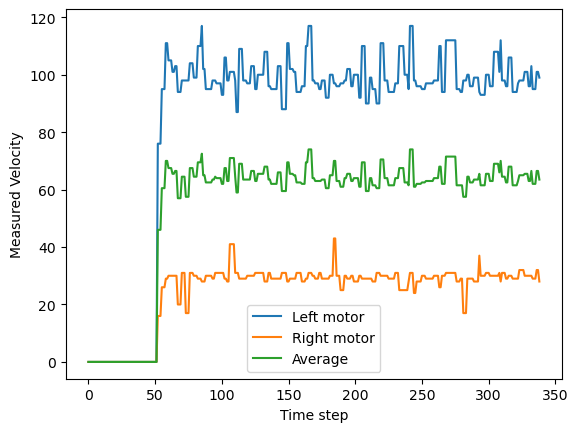

In [18]:
l_speed = [x["left_speed"] for x in thymio_data]
r_speed = [x["right_speed"] for x in thymio_data]
avg_speed = [(x["left_speed"]+x["right_speed"])/2 for x in thymio_data]
thymio_speed_to_ms = 0.43478260869565216*10**(-3)
var_speed = np.var([x / thymio_speed_to_ms for x in avg_speed[55:]])
std_speed = np.std([x / thymio_speed_to_ms for x in avg_speed[55:]])
# Variance of speed state and measurements
q_nu = std_speed/2 # variance on speed state
r_nu = std_speed/2 # variance on speed measurement
print(q_nu)
print(r_nu)
    
plt.plot(l_speed, label="Left motor")
plt.plot(r_speed, label="Right motor")
plt.plot(avg_speed, label="Average")
plt.xlabel("Time step")
plt.ylabel("Measured Velocity")
plt.legend()

<span style="color: #2980B9 ;">
<blockquote>
    Assuming that half of the variance is caused by the measurements and half is caused by perturbations to the states, this gives us :
    
- $q_\nu = 6.15  mm^2/s^2$
- $r_\nu = 6.15  mm^2/s^2$

In [19]:
# Variance on position state and measurement
qp = q_nu * Ts#0.04 # variance on position state
rp = r_nu * Ts#0.25 # variance on position measurement
q_theta = 0.1 # variance on angle orientation state
r_theta = 0.1 # variance on angle orientation measurement

# global parameters
R_w = 2.15*10**(-2) #Wheel radius
d = 10 *10**(-2) #distance between wheels
H = np.eye(3)
Q = np.array([[qp, 0, 0], [0, qp, 0], [0, 0, q_theta]]) # Variance of the measurements
R = np.array([[rp, 0, 0], [0, rp, 0], [0, 0, r_theta]]) # Variance of the state variables

In [3]:
r1 = 0.0017
r2 = 0.0017
r3 = 0.1 
    
H = np.array([[1.0,0,0],[0,1.0,0],[0,0,1.0]])
    
Q = np.array([[r1, 0, 0],[0, r2, 0], [0, 0, r3]])
R = np.array([[1,0,0],[0,1,0],[0,0,0.04]])

NameError: name 'np' is not defined

In [2]:
def Algorithm_EKF(measurements, mu_km, sig_km, u_k):
#def Algorithm_EKF(measurements, mu_km, sig_km, u_k):
    ## Prediciton through the a priori estimate
    # estimated mean of the state
    mu_k_pred = np.array([[0.0],[0.0],[0.0]])
    mu_k_pred[0] = mu_km[0,0] + (u_k[0]+u_k[1])/2 * R_w * Ts * math.sin(mu_km[2,0] + (u_k[0]-u_k[1])/d * R_w * Ts)
    mu_k_pred[1] = mu_km[1,0] +(u_k[0]+u_k[1])/2 * R_w * Ts * math.cos(mu_km[2,0] + (u_k[0]-u_k[1])/d * R_w * Ts)
    mu_k_pred[2] = mu_km[2,0] + (u_k[0]-u_k[1])/d * R_w * Ts

    # Jacobian of the motion model
    G_k = np.eye(3)
    G_k[0, 2] = (u_k[0]+u_k[1])/2 * R_w * math.cos(mu_km[2,0] + 1/2*(u_k[0]-u_k[1])/d * R_w)
    G_k[1, 2] = -(u_k[0]+u_k[1])/2 * R_w * math.sin(mu_km[2,0] + 1/2*(u_k[0]-u_k[1])/d * R_w)
    
    # Estimated covariance of the state
    sig_k_pred = np.dot(G_k, np.dot(sig_km, G_k.T))
    sig_k_pred = sig_k_pred + Q if type(Q) != type(None) else sig_k_pred
    
    if camera: 
        y = measurements
    
    else:
        # if no measurements we consider our measurements to be the same as our a priori estimate as to cancel out the effect of innovation
        y = mu_k_pred
        #print('y:',y)
        #print('--------')

    # innovation / measurement residual
    i = y - np.dot(H, mu_k_pred)
    #print('np.dot(H, mu_k_pred): ',np.dot(H, mu_k_pred))
    #print('innovation:', i)
    #print('--------')
    # measurement prediction covariance
    S = np.dot(H, np.dot(sig_k_pred, H.T)) + R

    # Kalman gain (tells how much the predictions should be corrected based on the measurements)
    K = np.dot(sig_k_pred,np.dot(H.T, np.linalg.inv(S)))

    # a posteriori estimate
    #print('mu_k_pred:', mu_k_pred)
    #print('--------')
    x_est = mu_k_pred + np.dot(K,i)
    #print('mu_k_pred + np.dot(K,i): ',mu_k_pred + np.dot(K,i))
    #print('--------')
    sig_est = sig_k_pred - np.dot(K,np.dot(H, sig_k_pred))

    return x_est, sig_est

In [22]:
x_est = [np.zeros((3, 1))]
mu_km = x_est[-1]
P_est = [1000 * np.ones(3)]
k0 = 55
speed = [avg_speed[k0-1]]
x_m = [np.zeros((3, 1))]
#print(-(l_speed[k0]+r_speed[k0])/2 * R_w * np.sin(x_est[2] + (l_speed[k0]-r_speed[k0])/d * R_w))
#print(-(l_speed[k0]+r_speed[k0])/2 * R_w * np.cos(x_est[-1][2] + (l_speed[k0]-r_speed[k0])/d * R_w))

In [23]:
RADIUS = R_w
thymio_speed_to_rads = (0.43478260869565216*10**(-3))/RADIUS
for k in tqdm(range(55, len(thymio_data))):
    speed.append(avg_speed[k])
    delta_L = np.array([x_est[-1][0,0], x_est[-1][1,0]]) * thymio_speed_to_ms
    print('delta_l is:',delta_L)
    x_meas = np.array([[(k+1)*delta_L[0]], [(k+1)*delta_L[1]], [x_est[-1][2,0]]])
    print('size of x_meas: ',x_meas)
    new_x_est, new_P_est = Algorithm_EKF(x_meas, x_est[-1], P_est[-1], [l_speed[k]*thymio_speed_to_rads, r_speed[k]*thymio_speed_to_rads])
    x_est.append(new_x_est)
    P_est.append(new_P_est)
    x_m.append(x_meas)
    
    

100%|███████████████████████████████████████| 284/284 [00:00<00:00, 3651.61it/s]

delta_l is: [0. 0.]
size of x_meas:  [[0.]
 [0.]
 [0.]]
delta_l is: [3.43048726e-08 1.14315269e-06]
size of x_meas:  [[1.95537774e-06]
 [6.51597031e-05]
 [3.00000000e-02]]
delta_l is: [1.02883746e-07 2.28476200e-06]
size of x_meas:  [[5.96725726e-06]
 [1.32516196e-04]
 [6.00000000e-02]]
delta_l is: [2.05674903e-07 3.42380057e-06]
size of x_meas:  [[1.21348193e-05]
 [2.02004234e-04]
 [9.00000000e-02]]
delta_l is: [3.71507143e-07 4.73661967e-06]
size of x_meas:  [[2.22904286e-05]
 [2.84197180e-04]
 [1.25652174e-01]]
delta_l is: [5.84028940e-07 6.04269348e-06]
size of x_meas:  [[3.56257653e-05]
 [3.68604302e-04]
 [1.61304348e-01]]
delta_l is: [8.29912765e-07 7.29477089e-06]
size of x_meas:  [[5.14545915e-05]
 [4.52275795e-04]
 [1.93913043e-01]]
delta_l is: [1.11648725e-06 8.53816615e-06]
size of x_meas:  [[7.03386968e-05]
 [5.37904467e-04]
 [2.26521739e-01]]
delta_l is: [1.44344770e-06 9.77155723e-06]
size of x_meas:  [[9.23806529e-05]
 [6.25379663e-04]
 [2.59130435e-01]]
delta_l is: [1.7

x_m = [np.zeros((3, 1))]
for k in tqdm(range(55, len(thymio_data))):
    delta_L = np.array([l_speed[k]*thymio_speed_to_mms, l_speed[k]*thymio_speed_to_mms 
                    , x_est[-1][1,0]]) * thymio_speed_to_mms
    x_meas = ((k+1)*delta_L, (k+1)*delta_L, x_est[-1][2,0])
    x_m.append(x_meas)

(-0.009302879095249758,
 0.19536046100024493,
 -0.10891198391526215,
 0.09582283772456623)

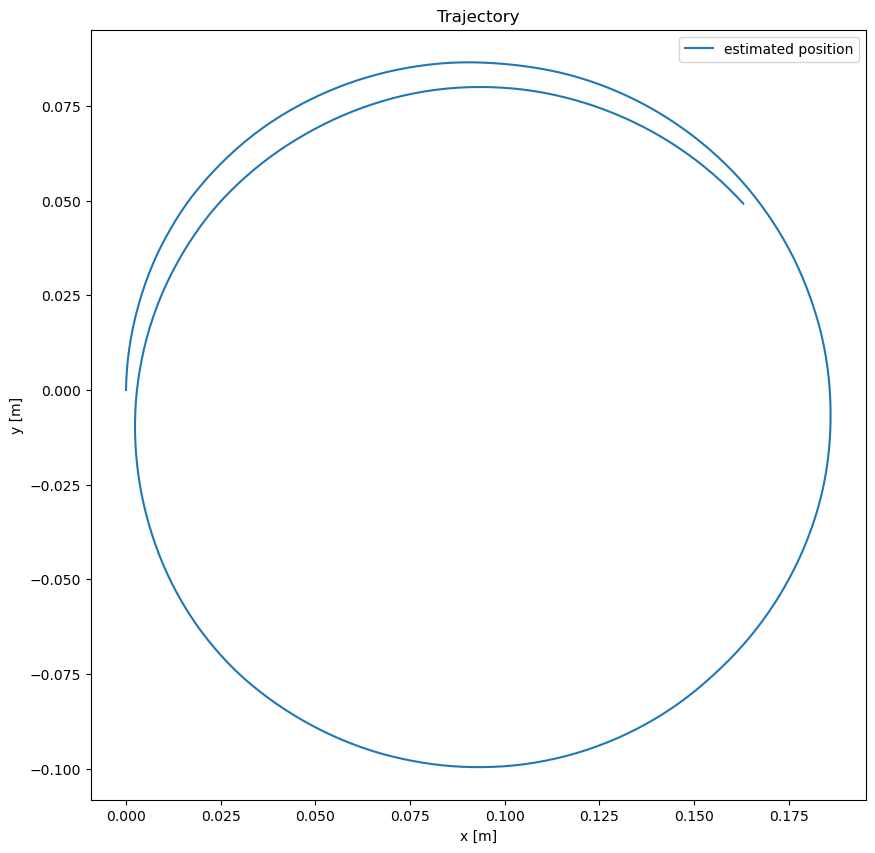

In [24]:
# Plot results :
plt.figure(figsize=(10,10))
plt.title("Trajectory")
plt.plot([x[0,0] for x in x_est], [x[1,0] for x in x_est],label="estimated position")
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.legend()
plt.axis('equal')

(-0.009302879095249758,
 0.19536046100024493,
 -0.10891198391526215,
 0.09582283772456623)

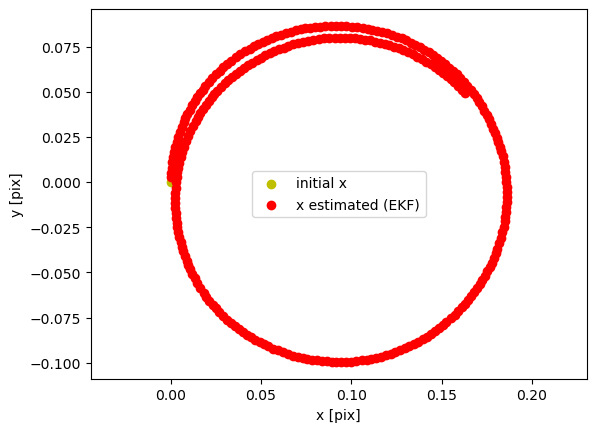

In [25]:
plt.xlabel("x [pix]")
plt.ylabel("y [pix]")

plt.scatter(0, 0, marker="o", color="y")

#plt.scatter(target_list[:,0], target_list[:,1], marker="o", color="r")
for i in range(len(x_est)-1):
    plt.scatter(x_est[i+1][0], x_est[i+1][1], marker="o", color="r")

plt.legend(['initial x','x estimated (EKF)'])
plt.axis('equal')
#to fit what the vision gives us 